In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
data = pd.read_csv("/content/AirPassengers.csv")

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.rename(columns= {'#Passengers':'Passengers'}, inplace= True)

In [6]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
data.shape

(144, 2)

In [9]:
data['Month'] = pd.to_datetime(data.Month)
data = data.set_index(data.Month)

In [10]:
data.drop('Month', axis=1, inplace= True)
print('Column DataTypes: \n', data.dtypes)

Column DataTypes: 
 Passengers    int64
dtype: object


In [11]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


**Time Series Characteristics**

Trend


Text(0.5, 1.0, 'Trend of the Time Series')

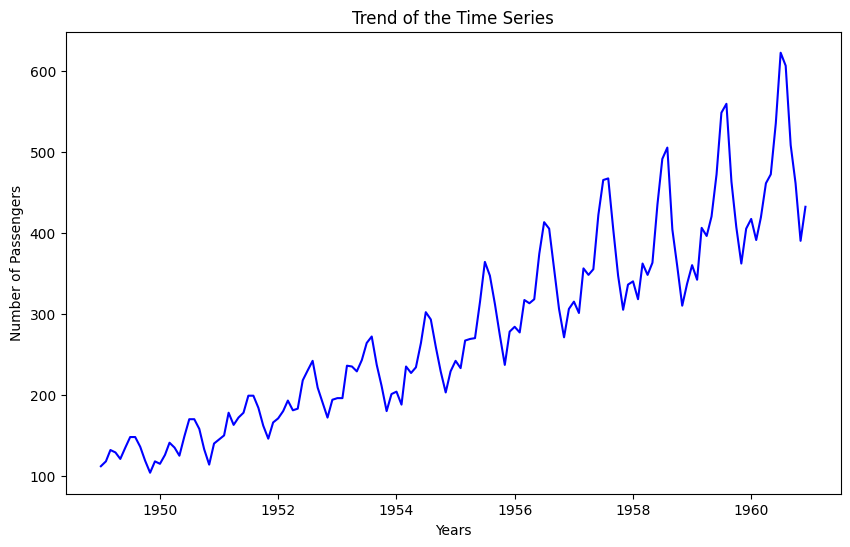

In [12]:
plt.figure(figsize=(10,6))
plt.plot(data, color = 'blue')
plt.xlabel("Years")
plt.ylabel("Number of Passengers")
plt.title('Trend of the Time Series')

Seasonality

In [16]:
data_temp = data.copy()
data_temp['Year'] = pd.to_datetime(data_temp.index).year
data_temp['Month'] = pd.to_datetime(data_temp.index).month

<Axes: title={'center': 'Seasonality of Time Series'}, xlabel='Month', ylabel='Passengers'>

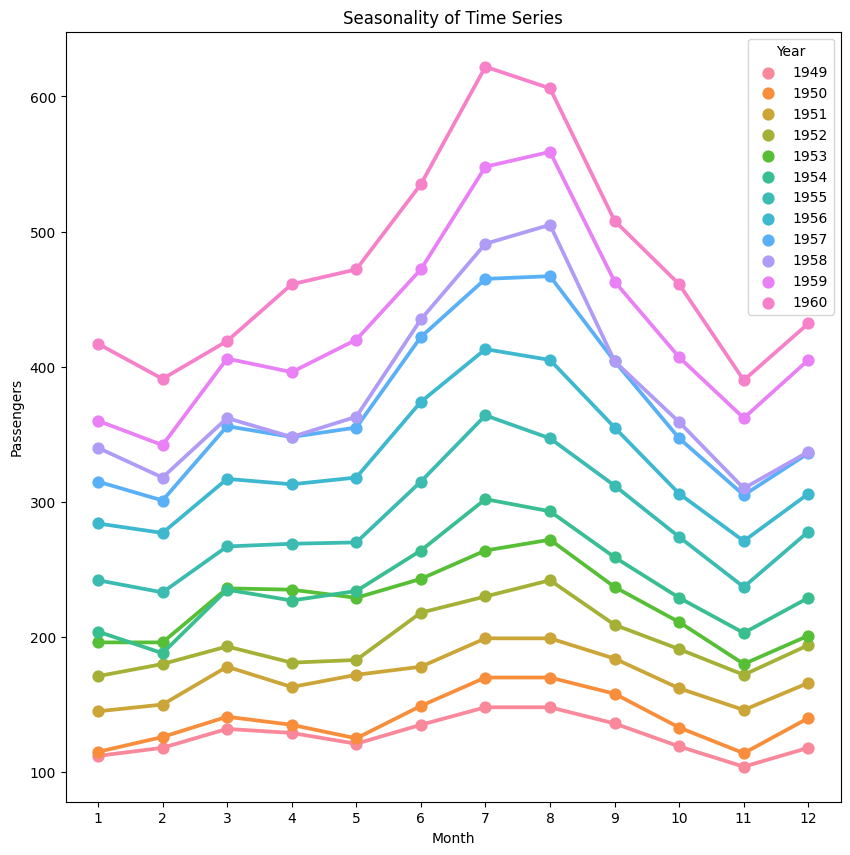

In [20]:
#Stacked Line Plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of Time Series')
sns.pointplot(x = 'Month', y = 'Passengers', hue = 'Year', data = data_temp)

**Decomposition of Time Series**

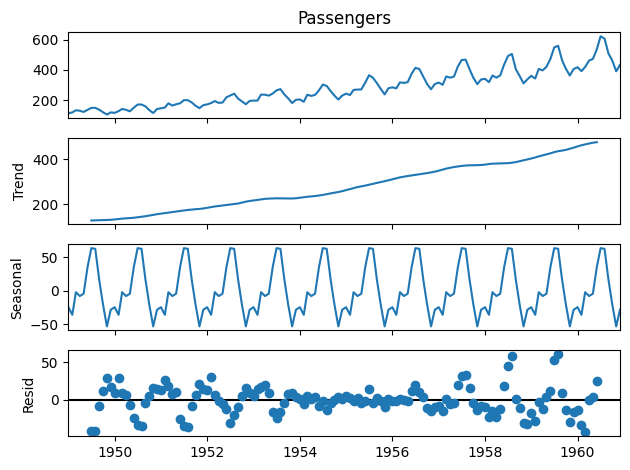

In [21]:
decomposition = seasonal_decompose(data['Passengers'], model = 'additive')
fig = decomposition.plot()

**Time Series Analysis**

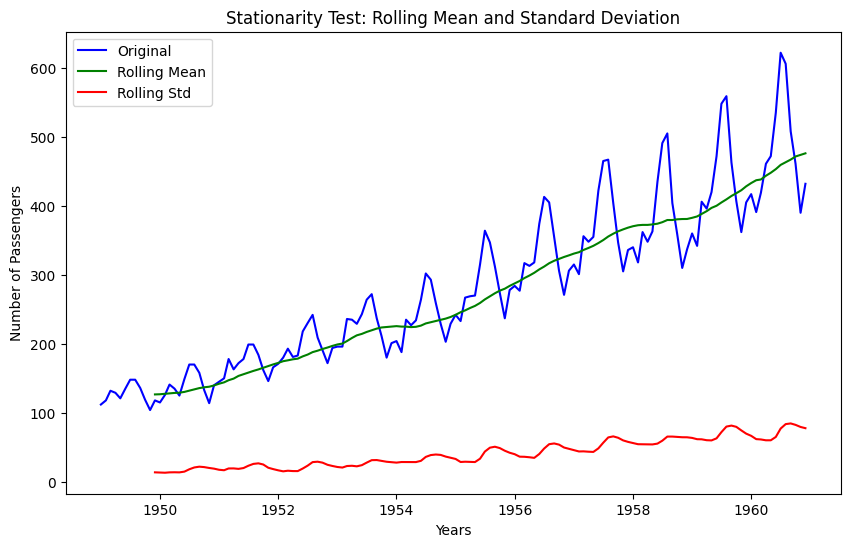

Results of Dicker Fuller Test
Test Statistics                 0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [24]:
from statsmodels.tsa.stattools import adfuller


timeseries = data['Passengers']

def stationarity_test(timeseries):
  rolling_mean = timeseries.rolling(window=12).mean()
  rolling_std = timeseries.rolling(window=12).std()

  # Plot rolling stats
  plt.figure(figsize=(10,6))
  plt.xlabel('Years')
  plt.ylabel('Number of Passengers')
  plt.title('Stationarity Test: Rolling Mean and Standard Deviation')
  plt.plot(timeseries, color = 'blue', label= 'Original')
  plt.plot(rolling_mean, color = 'green', label = 'Rolling Mean')
  plt.plot(rolling_std, color = 'red', label = 'Rolling Std')
  plt.legend()
  plt.show()

  #Dickey Fuller test
  print("Results of Dicker Fuller Test")
  data_test = adfuller(timeseries)
  data_output = pd.Series(data_test[:4], index = ['Test Statistics', 'p-value', '#Lags Used', 'Number of Observation Used'])
  for key, value in data_test[4].items():
    data_output['Critical Value (%s)' %key] = value
  print(data_output)
  return rolling_mean, rolling_std

rolling_mean, rolling_std = stationarity_test(timeseries)


**Converting Non-Stationary Data to Stationary Data**

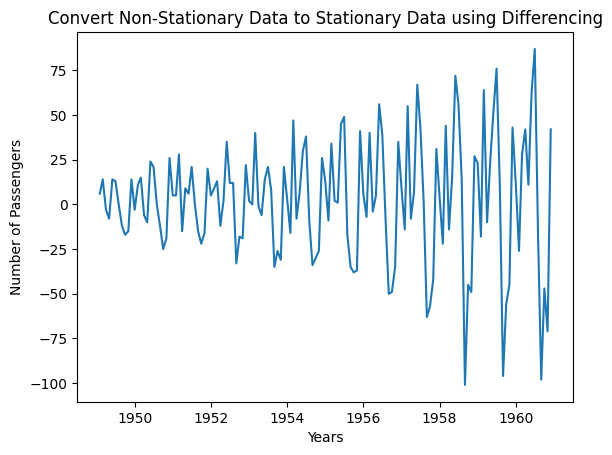

In [26]:
data_diff = data.diff(periods = 1)
plt.xlabel('Years')
plt.ylabel('Number of Passengers')
plt.title('Convert Non-Stationary Data to Stationary Data using Differencing')
plt.plot(data_diff)